In [15]:
import torch
import matplotlib.pyplot as plt
from torch import nn
from pathlib import Path

In [16]:
weight = 0.3
bias = 0.9

start = 0
end = 1
step = 0.02

x = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * x + bias
x[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.9000],
         [0.9060],
         [0.9120],
         [0.9180],
         [0.9240],
         [0.9300],
         [0.9360],
         [0.9420],
         [0.9480],
         [0.9540]]))

In [17]:
trains_split = int(0.8 * len(x))
x_train, y_train = x[:trains_split], y[:trains_split]
x_test, y_test = x[trains_split:], y[trains_split:]
len(x_train), len(y_train), len(x_test), len(y_test)

(40, 40, 10, 10)

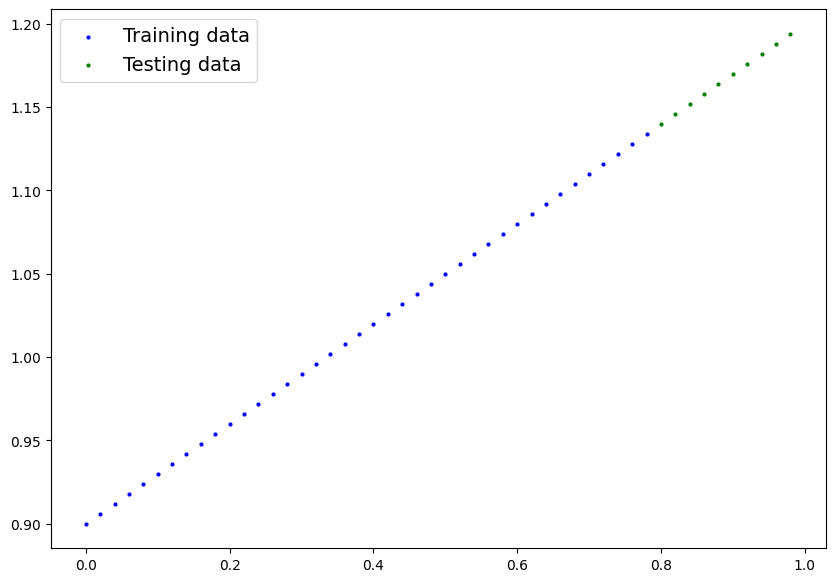

In [18]:
def plot_predictions(train_data = x_train,
                     train_labels = y_train,
                     test_data = x_test,
                     test_labels = y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions
  """
  plt.figure(figsize=(10,7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot training data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  #Are there predictions
  if predictions is not None:
    # Plot the prediction if exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

plot_predictions(x_train,y_train,x_test,y_test)

In [19]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1,
                            out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinearRegressionModel()
model_1, model_1.state_dict()

(LinearRegressionModel(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [23]:
loss_fn = nn.L1Loss()

optimize = torch.optim.SGD(params=model_1.parameters(),
                           lr = 0.001)

torch.manual_seed(42)

epochs = 300

for epoch in range(epochs):
  model_1.train()

  y_pred = model_1(x_train)

  loss = loss_fn(y_pred, y_train)

  optimize.zero_grad()

  loss.backward()

  optimize.step()

  model_1.eval()

  with torch.inference_mode():
    test_pred = model_1(x_test)

    test_loss = loss_fn(test_pred, y_test)

    if epoch % 20 == 0:
      print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")


Epoch: 0 | Loss: 0.007012799382209778 | Test loss: 0.008874619379639626
Epoch: 20 | Loss: 0.0003080591559410095 | Test loss: 0.000614976859651506
Epoch: 40 | Loss: 0.000392848247429356 | Test loss: 0.000655829906463623
Epoch: 60 | Loss: 0.000392848247429356 | Test loss: 0.000655829906463623
Epoch: 80 | Loss: 0.000392848247429356 | Test loss: 0.000655829906463623
Epoch: 100 | Loss: 0.000392848247429356 | Test loss: 0.000655829906463623
Epoch: 120 | Loss: 0.000392848247429356 | Test loss: 0.000655829906463623
Epoch: 140 | Loss: 0.000392848247429356 | Test loss: 0.000655829906463623
Epoch: 160 | Loss: 0.000392848247429356 | Test loss: 0.000655829906463623
Epoch: 180 | Loss: 0.000392848247429356 | Test loss: 0.000655829906463623
Epoch: 200 | Loss: 0.000392848247429356 | Test loss: 0.000655829906463623
Epoch: 220 | Loss: 0.000392848247429356 | Test loss: 0.000655829906463623
Epoch: 240 | Loss: 0.000392848247429356 | Test loss: 0.000655829906463623
Epoch: 260 | Loss: 0.000392848247429356 | T

In [24]:
model_1.eval()

with torch.inference_mode():
  y_preds = model_1(x_test)

y_preds

tensor([[1.1406],
        [1.1466],
        [1.1527],
        [1.1587],
        [1.1647],
        [1.1707],
        [1.1767],
        [1.1827],
        [1.1887],
        [1.1947]])

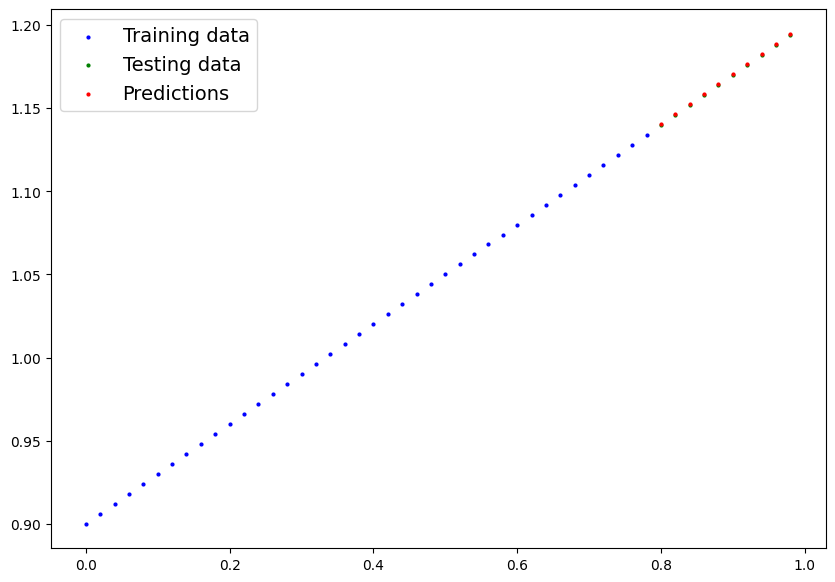

In [25]:
plot_predictions(predictions=y_preds)

In [26]:
MODEL_PATH = Path("Models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)


MODEL_NAME = "01_Pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME


print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: Models/01_Pytorch_workflow_model_1.pth
